# MTH9879 Homework 1

Assigned: February 1, 2018.
Due: February 15, 2018 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

## Junliang Zhou

Tel: (347) 276-1207

Email: gjimzhou@gmail.com

### 1. (4 points) 

Read Chapter 1 of Market Liquidity by Foucault, Pagano and R&ouml;ell.
What algorithmic trading strategy was being used by the seller who triggered the Flash
Crash of May 6, 2010? Why did it cause a crash? How could this algorithm have been
amended so as to avoid the ensuing disaster?

### Solution

The initial order to cause the chain effect was to sell seventy-five thousand E-mini futures contracts on the S&P 500 index traded on the CME–the largest change in a trader’s position since January 2010 and the strategy used to execute the order was so called “constant participation rate”, which are supposed to attenuate the impact on prices by splitting the initial order into smaller child orders.

Since the parent order was extremely large, the child orders are still relatively large comparing to normal book orders. As the child orders exhausted almost all limit orders avaliable, the strategy not only failed to reduced the market impact, but also accelerated market crash by causing servere hearding effect.

Based on the flaws shown during the flash crash, amendities can be made by taking received execution price into consideration. To be more precise, trading less as the price impact increases.

## The Smith Farmer zero-intelligence model

### Set up R-environment

The following code sources *ziSetup.R* which contains all the functions required for the problem.

In [1]:
options(warn=-1)

download.file(url="https://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSetup.zip", destfile="ziSetup.zip")
unzip(zipfile="ziSetup.zip")

source("ziSetup.R")
library(repr)
options(repr.plot.width=7, repr.plot.height=7)
library(pracma)

Warning message:
"package 'pracma' was built under R version 3.3.3"

### 2. (4 points)

Using the provided functions in *ziSetup.R* (with $\alpha = 1$, $\mu = 10$, $\delta = 1/5$),
initialize the order book and add two orders to the (best) bid side of the book. The resulting
book should have 3 orders at best bid and 1 order at best offer. Plot the resulting book
shape.

### Solution

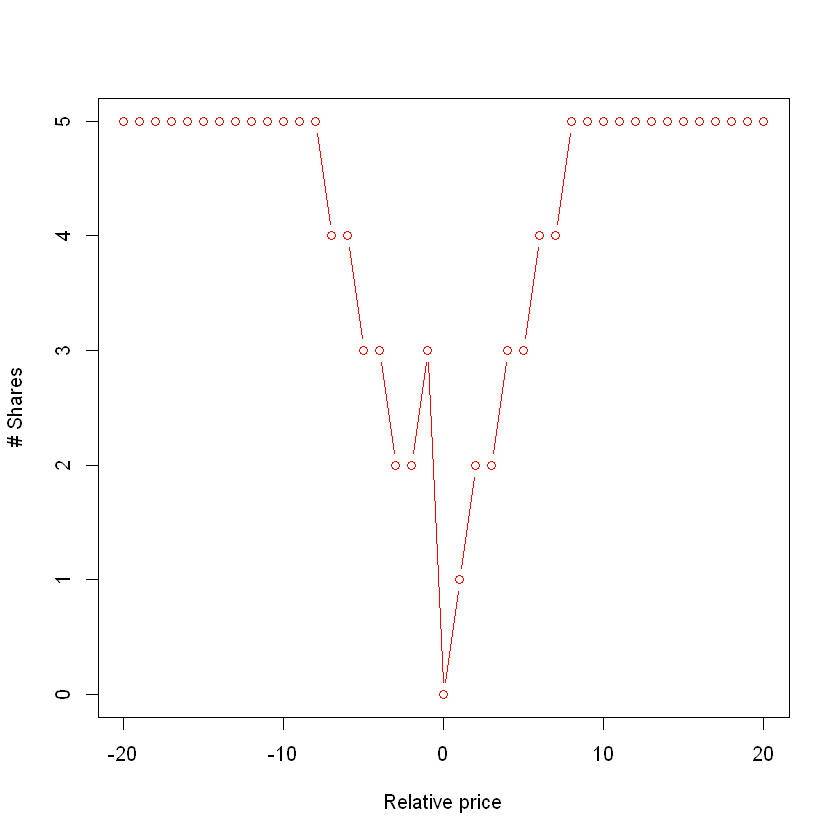

In [2]:
#Mystery tag
logging <- F

# Parameter settings
alpha <- 1
mu <- 10
delta <- 1/5

# Initialize book with asymptotic depth of 5 shares
initializeBook5()

# Add two orders to the (best) bid side
limitBuyOrder(bestBid())
limitBuyOrder(bestBid())

# Plot the resulting book shape
plot(-20:20, bookShape(20), main=NA, xlab="Relative price", ylab="# Shares", col="red", type="b")

### 3. (16 points)

(a) Using the code supplied to generate Figure 2 as a template, simulate 100,000 events, computing the average book shape (in a band $\pm 20$ around the mid price) for the
following sets of parameters:

|$\alpha$|$\mu$|$\delta$|
-----|-----:|-------:|
I| 1 | 10 | $\frac15$
II| 1 | 8 |  $\frac15$
III| 1 |  10 | $\frac16$
IV| 1  | 10 | $\frac18$ 

(Warning: This might take longer than 15 minutes to run!).

(b) Generate a summary plot of the average book shapes for each parameter set (I, II, II, and IV).


(c) Verify that the relationships between the slopes of the order books at-the-money for each parameter set are consistent with the predictions from dimensional analysis.

(d) Verify that the asymptotic book depths are consistent with the predictions from dimensional analysis.

### Solution

(a), (b)

In [3]:
# Function to plot average book shape for given parameters
plotAveBookShape <- function(a, m, d, n){

    # Mystery tag again
    logging <- F

    # Initialize order book
    alpha <<- a
    mu <<- m
    delta <<- d 
    initializeBook5()

    # Burn in for 100 events
    for(count in 1:100){
        generateEvent()
    }

    # Set event times
    numEvents <- 100000

    # Calculate average book shape
    avgBookShape <- bookShape(20) / numEvents
    for(count in 2:numEvents){
        generateEvent()
        avgBookShape <- avgBookShape + bookShape(20) / numEvents
    }
    
    # Fit order slope and depth
    fit1 <- lm(avgBookShape[12:21] ~ c(-9:0))
    fit2 <- lm(avgBookShape[21:30] ~ c(0:9))
    slope1 <- fit1$coefficients[2]
    slope2 <- fit2$coefficients[2]
    slope <- (slope2-slope1) / 2
    depth <- (mean(avgBookShape[1:10]) + mean(avgBookShape[32:41])) / 2
    results[n,1] <<- slope
    results[n,2] <<- depth
    
    # Plot the result
    plot(-20:20, avgBookShape, main=n, xlab="Relative price", ylab="# Shares", col="red", type="b")
}

        Slope    Depth
I   0.4879742 5.036658
II  0.5052223 5.036472
III 0.5946370 6.006891
IV  0.8367275 7.990405


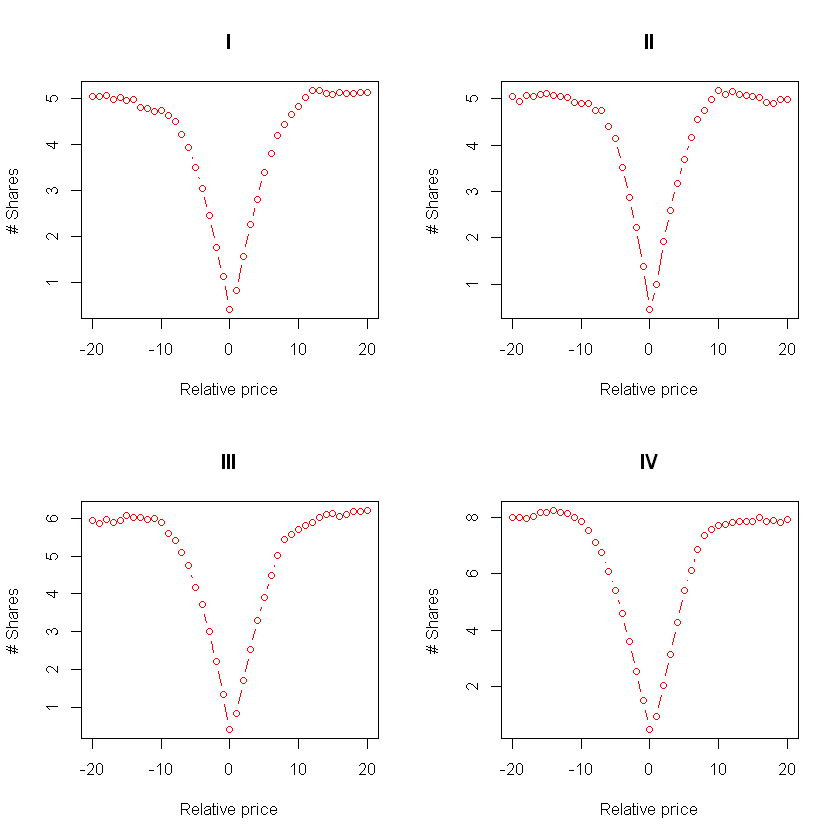

In [4]:
# Setup book parameters
alphas <- c(1, 1, 1, 1)
mus <- c(10, 8, 10, 10)
deltas <- c(1/5, 1/5, 1/6, 1/8)

# Setup result matrix
results <- matrix(0,4,2)
rownames(results) <- c("I", "II", "III", "IV")
colnames(results) <- c("Slope", "Depth")

# Set plots position
par(mfrow=c(2,2))

# Plot results
for (count in 1:4){
    plotAveBookShape(alphas[count], mus[count], deltas[count], rownames(results)[count])
}

print(results)

(c)

The slope of order book given by ZI model is $\frac{\alpha^2}{\mu\delta}$. The table below shows both calculated and simulated slopes for four sets.

|Calculated|Simulated|
-----|-----:|
I| 0.500 | 0.5013192 
II| 0.625 | 0.5070946
III| 0.600 | 0.6134964
IV| 0.800 | 0.8427480

We can see from the table that the slopes of order books are consistent with the predictions from dimensional analysis.

(d)

The asymptotic book depth of order book given by ZI model is $\frac{\alpha}{\delta}$. The table below shows both calculated and simulated depths for four sets.

|Calculated|Simulated|
-----|-----:|
I| 5 | 5.043502 
II| 5 | 5.022679
III| 6 | 6.017144
IV| 8 | 8.009415 

We can see from the table that the asymptotic book depths are consistent with the predictions from dimensional analysis.

### The following code sets up the data required for Problem 4.

In [5]:
download.file(url="https://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSimResults.rData_.zip", destfile="ziSimResults.rData.zip")
unzip(zipfile="ziSimResults.rData.zip")
load("ziSimResults.rData")

### 4. (12 points)

The datafile *ziSimResults.rData* contains a list of bid and ask prices after 100 events resulting from 10,000 simulations of the SFGK model with $\alpha = 1$, $\mu = 10$, and $\delta = 1/5$. The $j$th element of the list has results for an initial book configuration with $q_b = j$ shares on the bid side and $q_a = 1$ share on the ask side.

In [6]:
head(data.frame(ziSimResults))

,bid,ask,bid.1,ask.1,bid.2,ask.2,bid.3,ask.3,bid.4,ask.4,bid.5,ask.5,bid.6,ask.6,bid.7,ask.7,bid.8,ask.8,bid.9,ask.9
1,-1,2,-2,2,-2,4,-1,3,-1,3,-1,2,-1,2,0,3,-1,2,-1,0
2,-1,4,-3,-1,-2,3,1,3,-2,1,-1,0,-1,3,0,4,-1,1,1,2
3,-2,-1,-1,0,-1,0,-1,3,-2,2,-1,2,2,3,-1,1,-1,1,-1,0
4,0,3,-2,3,-2,3,-2,1,0,3,-1,2,-1,1,-1,2,-1,0,-1,3
5,-2,2,0,4,0,3,3,5,-2,2,0,3,-1,2,-1,2,-1,2,1,3
6,-2,0,-4,1,-1,1,-3,2,-1,3,1,3,-1,1,1,2,3,4,2,3


(a) For each size $q_b$ at best bid, compute the mean mid-price after 10,000 events and with error computed as standard deviation of the mean.

(b) Plot mean mid-price vs size at best bid, reproducing Figure 3 of the lecture slides. 
Remember to include error bars!

(c) Repeat part (b) with the order book imbalance $I$ on the x-axis, reproducing Figure 7 in the lecture slides.


(d) If you see an order book with large quantity at the bid and small quantity at the offer, what does it tell you about the future price?

### Solution

(a)

In [7]:
# Extract data
simResults <- as.matrix(data.frame(ziSimResults))

# Setup parameters
bidSizes <- 1:10
imbalances <- (bidSizes - 1) / (bidSizes + 1)

# Setup result matrix
results <- matrix(0,2,10)
rownames(results) <- c("Mean", "Std")
colnames(results) <- bidSizes

# Calculate mean and standard deviation
for (i in bidSizes){
    
    # Initialize variables
    bidPrice <- simResults[,2*i]
    askPrice <- simResults[,2*i-1]
    midPrice <- bidPrice
    numEvents <- length(bidPrice)
        
    # Calculate
    for (j in 1:length(bidPrice)){
        midPrice[j] <- (bidPrice[j] + askPrice[j]) / 2
    }
    
    # Transfer results to the result matrix
    results[1,i] <- mean(midPrice)
    results[2,i] <- sd(midPrice) / sqrt(numEvents)
}

# Output results
print(results)

              1         2          3          4          5          6
Mean 0.00590000 0.2155000 0.41350000 0.56635000 0.66850000 0.74110000
Std  0.01537986 0.0143163 0.01310835 0.01229115 0.01123358 0.01038017
              7           8           9          10
Mean 0.80530000 0.809550000 0.838800000 0.834350000
Std  0.01019091 0.009888385 0.009779878 0.009617315


(b)

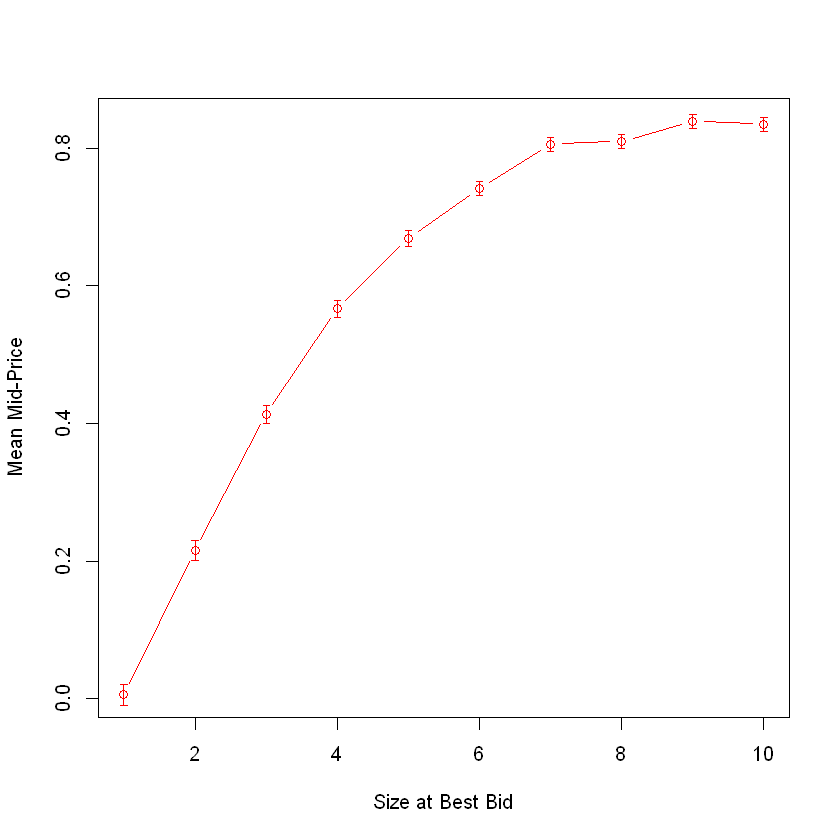

In [8]:
# Plot mid-price vs size at best bid
plot(bidSizes, results[1,], col="red", type="b", xlab="Size at Best Bid", ylab="Mean Mid-Price")
errorbar(bidSizes, results[1,], yerr=results[2,], add=T, cap=0.015, col="red", lwd=1.5)

(c)

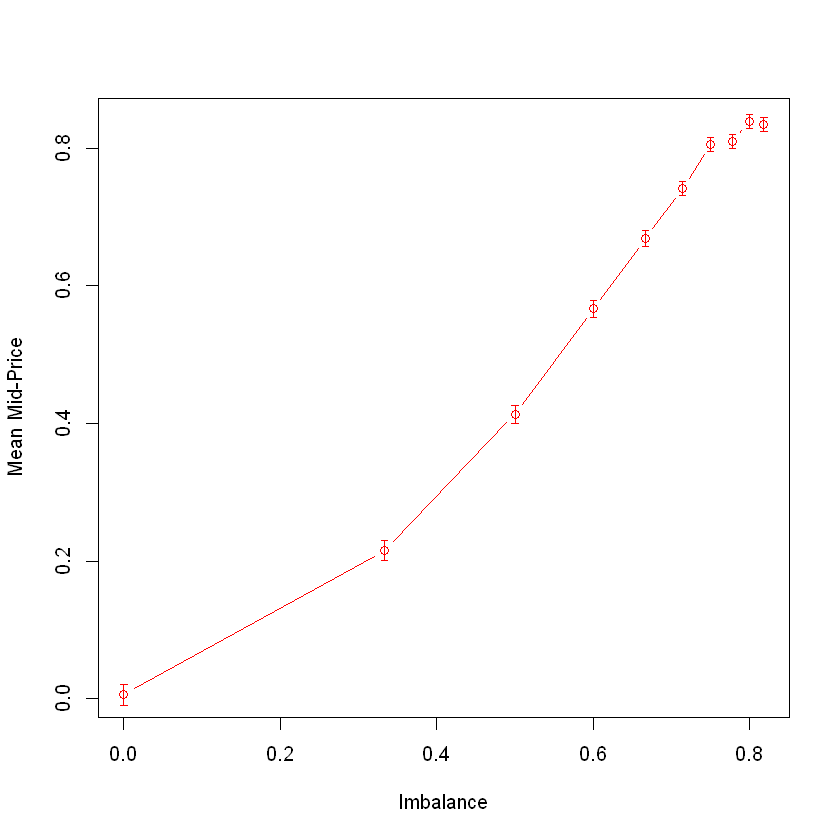

In [9]:
# Plot mid-price vs book imbalance
plot(imbalances, results[1,], col="red", type="b", xlab="Imbalance", ylab="Mean Mid-Price")
errorbar(imbalances, results[1,], yerr=results[2,], add=T, cap=0.015, col="red", lwd=1.5)

(c)

If there is an order book with large quantity at the bid and small quantity at the offer, the mid-price tend to increase and it's proportion to the imbalance at the best quotes.

## Is the market price a martingale?

### 5. (4 points) 

A derivatives quant explains (patiently) to you that asset prices are martingales (informally speaking that expected price changes are zero). Do you agree? How is your understanding consistent with the derivative quant’s understanding?

### Solution

From the perspective of a continuous, frictionless, and efficient market based on stochastic calculus, asset prices are martingales. From the perspective of mid-prices in real market, asset prices are definitively not martingales. While the conclusions drawn from two models are different, they are not contradicting with each other.

The market mid-price is calculated by the arithmetic average of the prices at the best quotes, which neglects the effect of quote sizes on both sides. Therefore, the momentum of mid-price becomes predictable by computing the imbalance around the spread and so diminishes the property of martingale.

Note that prices in martingale theory are assumed to be continuous. By introducing the concept of micro-price, we can reduce the gap between the two models. Micro-price is proposed to reflect the effect of quote sizes on asset prices. The major definitions of micro-price all take the imbalance into consideration. by including the momentum, we mentioned before into micro-price itself, it is a more precise approximation of the ideal martingale asset price, comparing to the original mid-price.

To sum up, the two understandings on based on two different angles of view on the market. Each point of view extracts some essentials of the market and forms different models to reflect some properties of the market. 